In [764]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [765]:
V0 = 60
Tm = 1827.8
tp = 1
Tp = 735

In [766]:
# Time
dt = 1e-4
t = np.arange(dt,1.11+dt,dt)
# Power funciton
wv = np.zeros(len(t))
a = 0.003
b = 0.01
c = 1e-5
d = 1.1

for i in range(len(t)):
    if t[i] < 0.01:
        wv[i] = c
    elif (0.01 <= t[i]) & (t[i] < (0.01+a/2)):
        wv[i] = c + 2/a**2*(t[i]-0.01)**2
    elif (0.01+a/2 <= t[i]) & (t[i] < (0.01+a)):
        wv[i] = c + -2/a**2*(t[i]-0.01-a)**2+1
    elif ((0.01+a) <= t[i]) & (t[i] < (0.01+b-a)):
        wv[i] = c + 1
    elif ((0.01+b-a) <= t[i]) & (t[i] < (0.01+b-a/2)):
        wv[i] =c + -2/a**2*(t[i]-0.01-b+a)**2+1
    elif ((0.01+b-a/2) <= t[i]) & (t[i] < (0.01+b)):
        wv[i] =c + 2/a**2*(t[i]-0.01-b)**2
    else:
        wv[i] = c

V = V0 * wv
P = V**2/4.418081

# heat transfer
T0 = 730
T = np.zeros(len(t))+T0





In [767]:
def heat_balance(x):
    kh = x[0]
    Cp = kh*0.010783 #J/K
    h = x[1]

    Q = np.zeros(len(t))
    for i in range(len(Q)-1):
        dQ = (T[i]-T0)
        if dQ <= 0:
            dQ = 1e-6
        Q = P[i]*(dt) - h*dQ**(1)*(dt)
        T[i+1] = Q/Cp + T[i]

In [768]:
def lsq(x):
    heat_balance(x)
    return ((T[np.argmax(T)]-Tm)/Tm)**2 + ((T[np.argwhere(t==tp)]-Tp)/(Tp))**2

In [769]:
x0 = [0.5,0.05]
bounds= [(0.1,2),(1e-5,0.1)]
res = minimize(lsq,x0,bounds=bounds)

In [770]:
print(res.fun)
print(res.x)

2.8339680028683453e-12
[0.42373505 0.02511246]


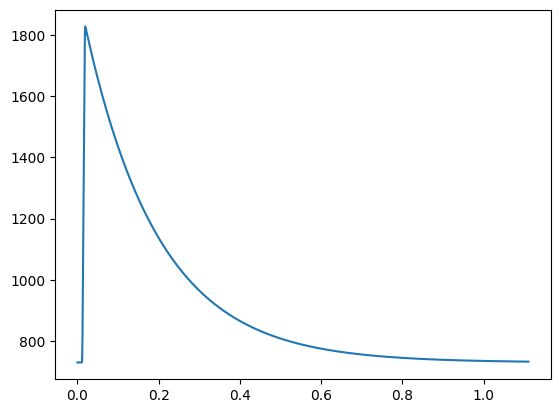

1827.8004924205761
[1.0002]
[[744.31594833]]


In [771]:
plt.plot(t,T)
plt.show()
print(T[np.argmax(T)])
i = np.argwhere(t==0.015)
test_T = T[i[0][0]:]
ti = t[np.argwhere(test_T<Tp)][0]
print(ti+0.015)
print(T[np.argwhere(t==0.8087)])